# Exploratory Data Analysis

Author: Craig Wilcox

## Introduction

This exploratory data analysis will be conducted through a Jupyter notebook for ease of access and to keep functions organized. Each analysis will be kept separate and will build on itself. Additional explanation will be given between steps if needed in order to give additional information.

### Initial Data Inspetion with Descriptive Statistics

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ Path to your SQLite database (go up one level from 'analysis/')
db_path = "../data/salary_data_clean.db"

# Connect and detect the single table automatically
conn = sqlite3.connect(db_path)
table_name = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'][0]

# Load the table into a pandas DataFrame
df = pd.read_sql(f"SELECT * FROM {table_name};", conn)
conn.close()

print(f"✅ Loaded table '{table_name}' with shape {df.shape}")
print(df.head())

✅ Loaded table 'salary_data_clean' with shape (6698, 6)
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [2]:
# Summary of numeric columns: count, mean, std, min, max, quartiles
print("\n--- Numeric Summary ---")
print(df.describe().T)

# Additional measures
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print(f"Median: {df[col].median()}")
    print(f"Variance: {df[col].var()}")
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurtosis()}")


--- Numeric Summary ---
                      count           mean           std    min      25%  \
Age                  6698.0      33.623022      7.615784   21.0     28.0   
Years of Experience  6698.0       8.095178      6.060291    0.0      3.0   
Salary               6698.0  115329.253061  52789.792507  350.0  70000.0   

                          50%       75%       max  
Age                      32.0      38.0      62.0  
Years of Experience       7.0      12.0      34.0  
Salary               115000.0  160000.0  250000.0  

Column: Age
Median: 32.0
Variance: 58.00016873806444
Skewness: 0.9051232700582525
Kurtosis: 0.18616704509640591

Column: Years of Experience
Median: 7.0
Variance: 36.72712770473028
Skewness: 0.9807657846031701
Kurtosis: 0.766842409034461

Column: Salary
Median: 115000.0
Variance: 2786762192.9320683
Skewness: 0.05721430329226778
Kurtosis: -1.1670067154659953


In [3]:
# Summary for object / categorical columns
print("\n--- Categorical Summary ---")
cat_cols = df.select_dtypes(include='object').columns
print(df[cat_cols].describe())

# Value counts for each categorical column
for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


--- Categorical Summary ---
       Gender Education Level          Job Title
count    6698            6698               6698
unique      3               4                191
top      Male      Bachelor's  Software Engineer
freq     3671            3021                518

Value counts for 'Gender':
Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

Value counts for 'Education Level':
Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

Value counts for 'Job Title':
Job Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1


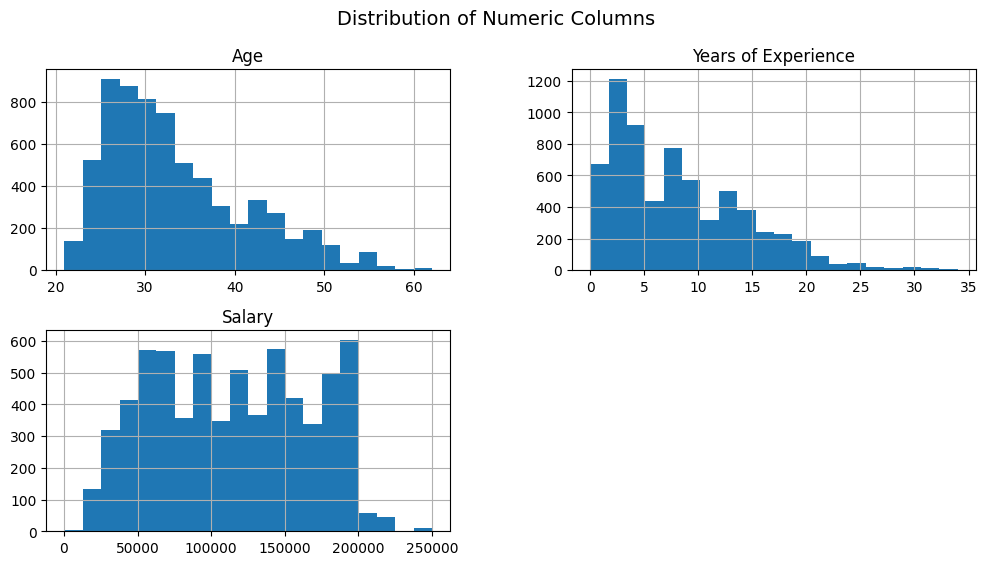

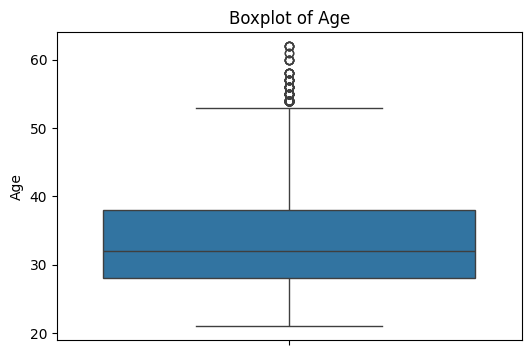

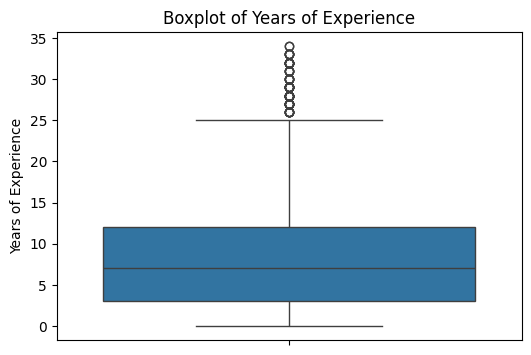

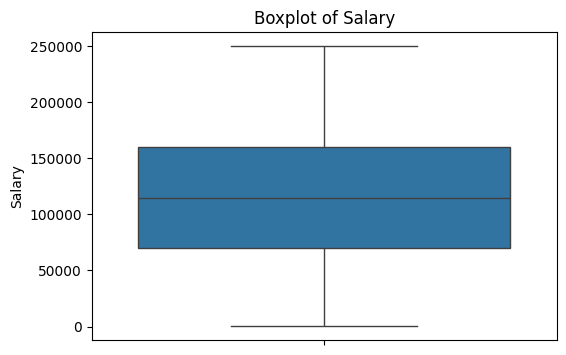

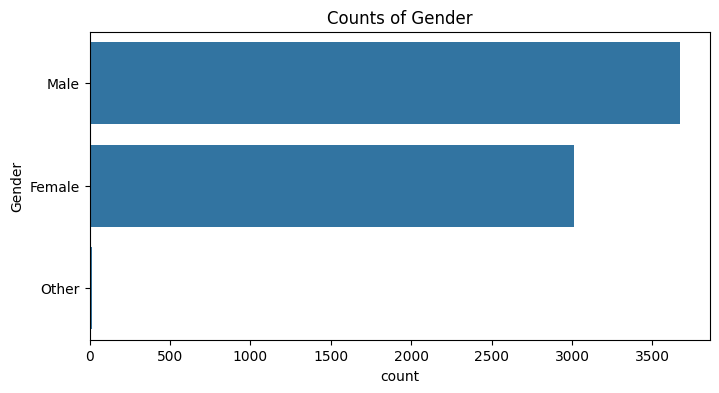

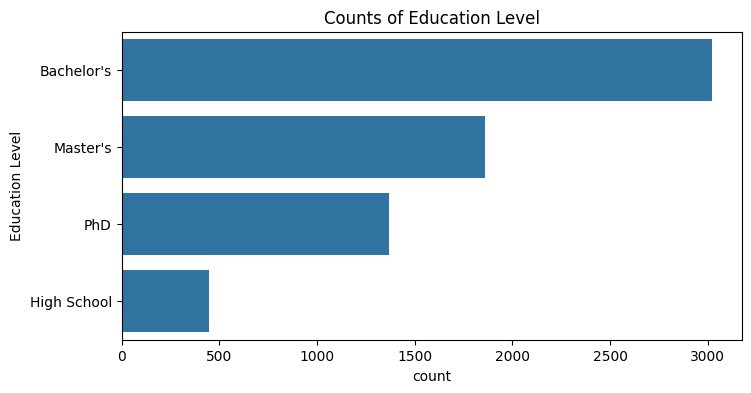

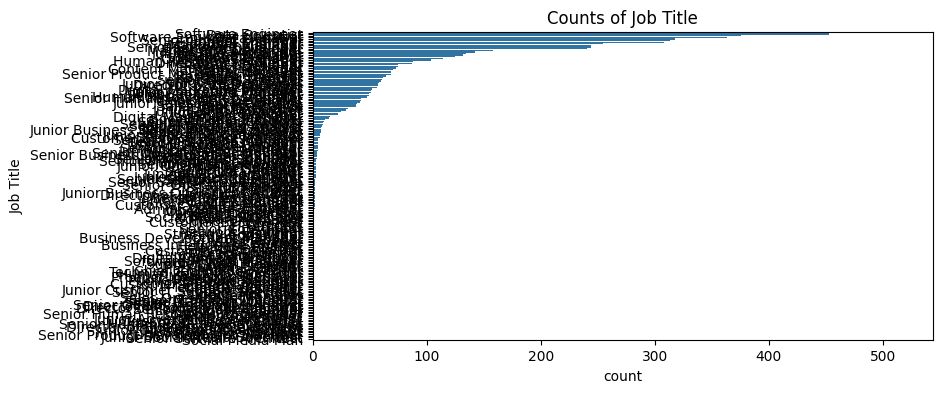

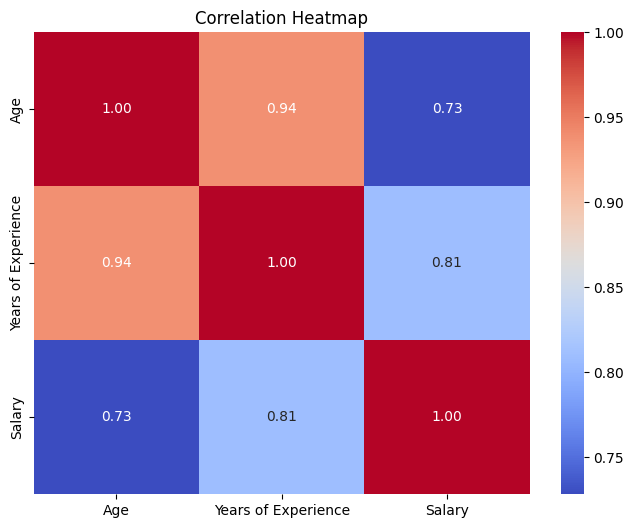

In [4]:
# Histograms for numeric columns
df[numeric_cols].hist(bins=20, figsize=(12,6))
plt.suptitle("Distribution of Numeric Columns", fontsize=14)
plt.show()

# Boxplots for numeric columns (detect outliers)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
    
# Countplots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.show()

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

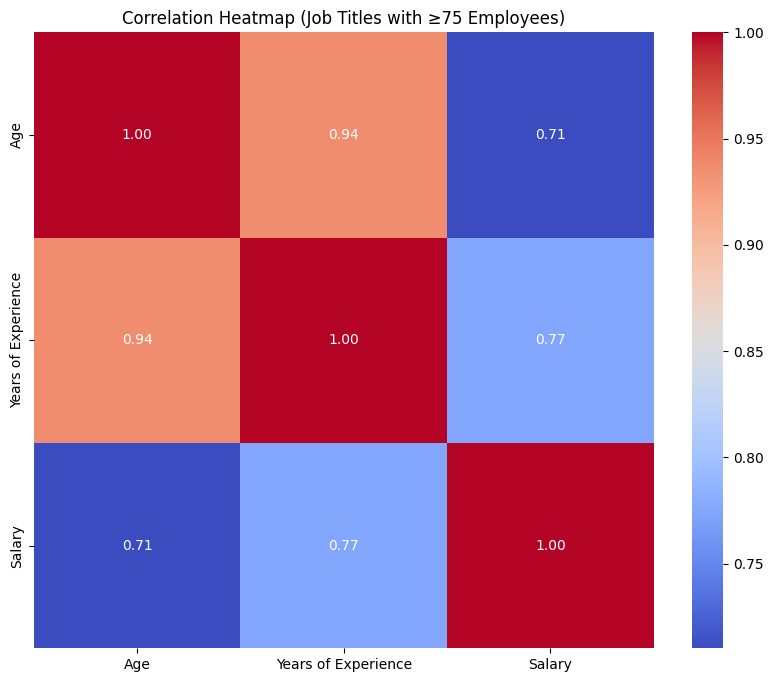

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Filter job titles with >= 75 rows ---
min_count = 75
job_counts = df['Job Title'].value_counts()
top_jobs = job_counts[job_counts >= min_count].index
df_filtered = df[df['Job Title'].isin(top_jobs)]

# --- Select numeric columns ---
numeric_cols = df_filtered.select_dtypes(include='number').columns

# --- Plot correlation heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(df_filtered[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f"Correlation Heatmap (Job Titles with ≥{min_count} Employees)")
plt.show()



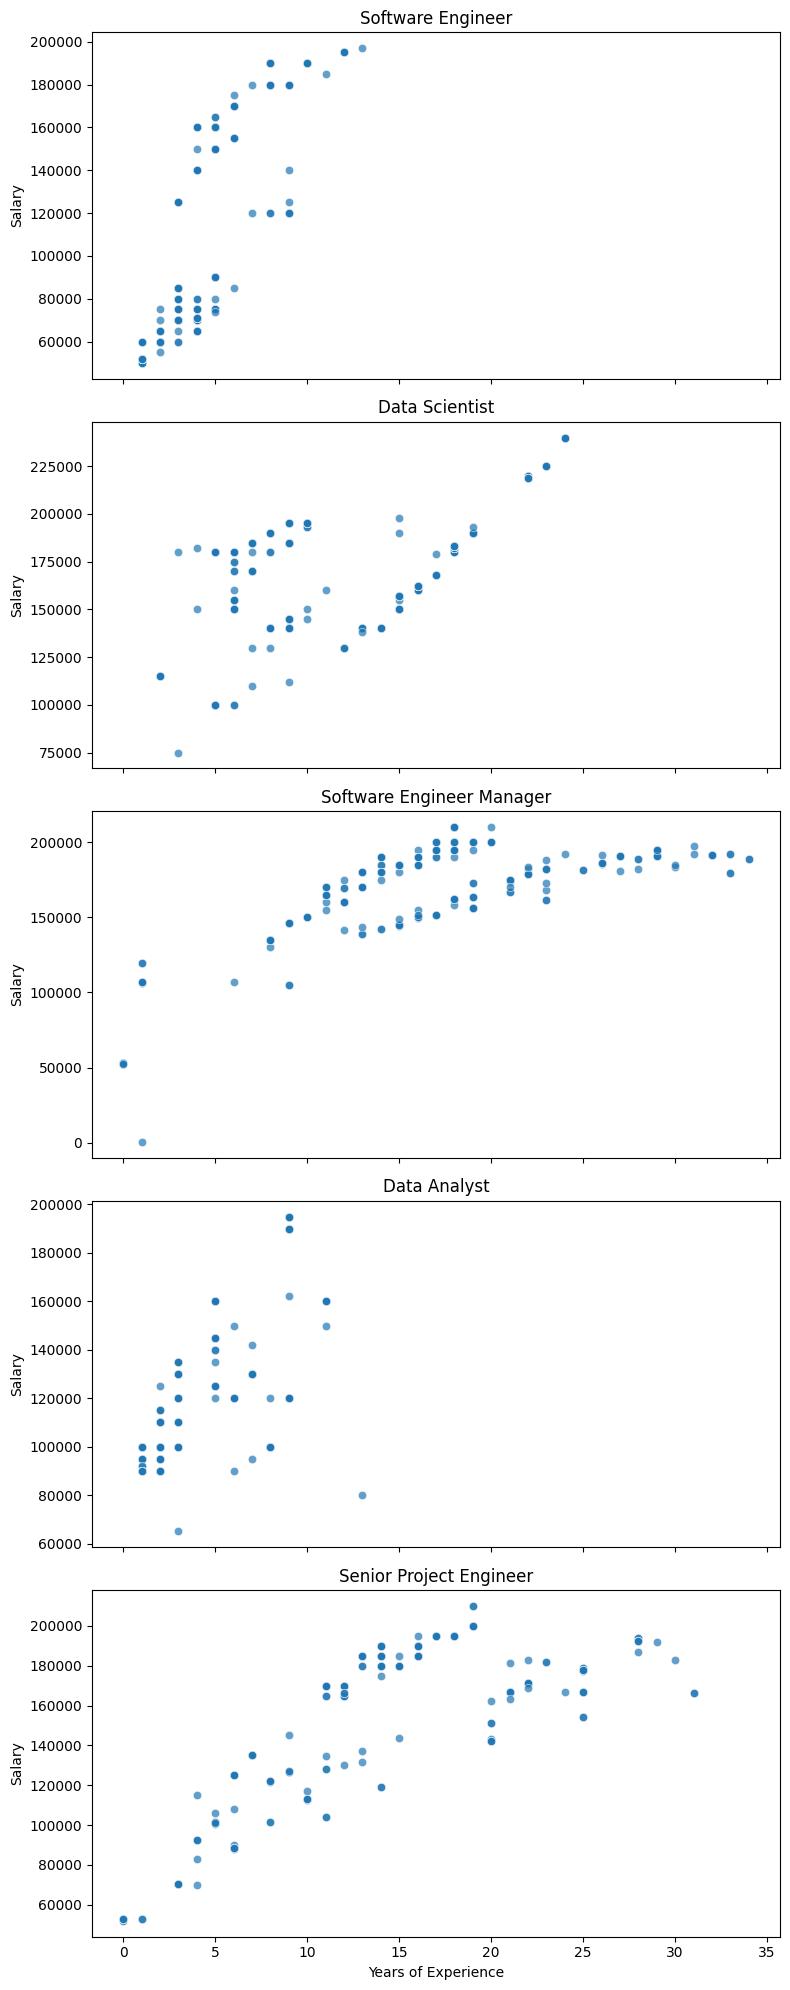

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Select the 5 most common job titles ---
top_jobs = df['Job Title'].value_counts().nlargest(5).index
df_filtered = df[df['Job Title'].isin(top_jobs)]

# --- Create subplots ---
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 20), sharex=True)

for ax, job in zip(axes, top_jobs):
    job_data = df_filtered[df_filtered['Job Title'] == job]
    sns.scatterplot(
        data=job_data,
        x='Years of Experience',  # exact column name
        y='Salary',
        ax=ax,
        color='tab:blue',
        alpha=0.7
    )
    ax.set_title(f"{job}")
    ax.set_ylabel("Salary")
    
axes[-1].set_xlabel("Years of Experience")
plt.tight_layout()
plt.show()